## Initial Questions

1. How does the distribution of retweets for a post depending on the time of day when the tweet is created?
2. How does positive and negative sentiment affect popularity for retweets? 
3. What Tweets do we think will become popular for retweet?

## Data

Provided excel sheet used to analyse the popularity

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import csv
import json

from collections import Counter
import ast

In [2]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.notebook_repr_html', True)

In [3]:
import datetime
import time
from datetime import datetime
from datetime import date

In [4]:
tweetdf = pd.read_excel (r'C:\Users\enaravu\Downloads\DS Tweet.xlsx')

In [5]:
tweetdf.shape

(42368, 32)

In [6]:
tweetdf.columns

Index(['TweetPostedTime', 'TweetID', 'TweetBody', 'TweetRetweetFlag', 'TweetSource', 'TweetInReplyToStatusID', 'TweetInReplyToUserID', 'TweetInReplyToScreenName', 'TweetRetweetCount', 'TweetFavoritesCount', 'TweetHashtags', 'TweetPlaceID', 'TweetPlaceName', 'TweetPlaceFullName', 'TweetCountry', 'TweetPlaceBoundingBox', 'TweetPlaceAttributes', 'TweetPlaceContainedWithin', 'UserID', 'UserName', 'UserScreenName', 'UserLocation', 'UserDescription', 'UserLink', 'UserExpandedLink',
       'UserFollowersCount', 'UserFriendsCount', 'UserListedCount', 'UserSignupDate', 'UserTweetCount', 'MacroIterationNumber', 'tweet.place'],
      dtype='object')

In [7]:
tweetdf.head()

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,TweetHashtags,TweetPlaceID,TweetPlaceName,TweetPlaceFullName,TweetCountry,TweetPlaceBoundingBox,TweetPlaceAttributes,TweetPlaceContainedWithin,UserID,UserName,UserScreenName,UserLocation,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"Maldives, vacation, travel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3325724261,CjQenterprises,CjQenterprises,United States,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN
1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"giftideas, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,101222953,monica,mama0004,durham nc,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN
2,Tue Dec 20 10:56:55 +0000 2016,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",NaN,NaN,NaN,0,0,"travel, TTOT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,42725028,Paula Schuck,inkscrblr,Canada,Thrifty Mom Media social media consulting and ...,https://t.co/cEhGzaQJp6,http://www.thriftymommastips.com/,23433,24762,961,Tue May 26 21:26:09 +0000 2009,147958,0,NaN
3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,"yoga, bresil, meditation, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3541532718,Primal Sanctuary,primalsanctuary,"Cypress, Texas, USA","Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN
4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773556998034063360,Joe,biryukovasever2,Providence,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN


In [8]:
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))
missing(tweetdf)

TweetPlaceContainedWithin    100.00
TweetPlaceAttributes         100.00
TweetInReplyToStatusID        99.76
TweetInReplyToUserID          99.55
TweetInReplyToScreenName      99.55
tweet.place                   97.64
TweetPlaceID                  97.64
TweetPlaceName                97.64
TweetPlaceFullName            97.64
TweetCountry                  97.64
TweetPlaceBoundingBox         97.64
UserExpandedLink              60.91
UserLink                      60.82
UserLocation                  37.83
UserDescription               10.30
TweetHashtags                  0.24
UserListedCount                0.00
TweetID                        0.00
TweetBody                      0.00
TweetRetweetFlag               0.00
TweetSource                    0.00
UserTweetCount                 0.00
UserSignupDate                 0.00
UserScreenName                 0.00
TweetRetweetCount              0.00
TweetFavoritesCount            0.00
UserName                       0.00
UserFriendsCount            

In [9]:
tweetdf["TweetRetweetCount"].unique()

array([   1,    0, 3065, 2970,   11,    7,  185,    5,   18,  135,    2,
          3,   69,   61,   60,   32,   36,   50,    4,    9,   22,    8,
         20,   21,  115,   29,   37,  204,   12,   24,   70,   16,  144,
         95,   25,    6,  160,   99,  117,  129,   42,   27,   15,   14,
         10,   19,   64,   17,   39,   91,  188,  132,  314,  254,  101,
        154,  143,  650,   41,   72,   49,  194,   63,   30,  153,   94,
        222,   53,   45,   54,   13,   74,   86,   26,   83,   56,  124,
        119, 3180,   55,  121,   34,   33,   46,   31,   44, 2971,   52,
        171,   78,  252,  202,  177,  106,   48,   75,   84,  111,  149,
       3241,   28,  120,  214,   57, 2973,   23,   51,   96,  113,   87,
        325,   81,  260,  156,   35,   73, 3309,  597,   66,  911,  139,
        497,   40,  125,  228,  742,  743,  321,  217,  219,  354,  133,
        109, 3069,  163,  162,  255,  199,  293,  100,   77,   62,   98,
         71,   38,  108,  116,  668, 3228,  118,  4

In [10]:
tweetdf["TweetFavoritesCount"].unique()

array([   0,    1,    3,    2,    4,    7,    5,    6,    8,   14,   10,
         17,   13,   33,   18,   15,   23,   16,   20,    9,   11,   64,
         27,   24,   21,   12,   25,   32,   28,   26, 2473,   30,   22,
         47, 2557,   44,  118,   48, 2750,   19,  135,   34,   67,   39,
         35,   50, 2687,   29,   59, 2813,  114,   66, 2762,   98,   60,
       2354,   57,   53, 1813,  143, 2584,   36,  151], dtype=int64)

In [11]:
tweetdf = tweetdf[tweetdf['TweetRetweetCount'] != 0]

In [12]:
#tweetdf = tweetdf[tweetdf['TweetFavoritesCount'] != 0]

In [13]:
tweetdf.shape

(28593, 32)

## Data wrangling

Filter for unique tweet ids

In [14]:
df_filtered = tweetdf.copy()

In [15]:
df_filtered.columns

Index(['TweetPostedTime', 'TweetID', 'TweetBody', 'TweetRetweetFlag', 'TweetSource', 'TweetInReplyToStatusID', 'TweetInReplyToUserID', 'TweetInReplyToScreenName', 'TweetRetweetCount', 'TweetFavoritesCount', 'TweetHashtags', 'TweetPlaceID', 'TweetPlaceName', 'TweetPlaceFullName', 'TweetCountry', 'TweetPlaceBoundingBox', 'TweetPlaceAttributes', 'TweetPlaceContainedWithin', 'UserID', 'UserName', 'UserScreenName', 'UserLocation', 'UserDescription', 'UserLink', 'UserExpandedLink',
       'UserFollowersCount', 'UserFriendsCount', 'UserListedCount', 'UserSignupDate', 'UserTweetCount', 'MacroIterationNumber', 'tweet.place'],
      dtype='object')

In [16]:
df_filtered.drop_duplicates(subset='TweetID', keep = False, inplace = True)
df_filtered.head()

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,TweetHashtags,TweetPlaceID,TweetPlaceName,TweetPlaceFullName,TweetCountry,TweetPlaceBoundingBox,TweetPlaceAttributes,TweetPlaceContainedWithin,UserID,UserName,UserScreenName,UserLocation,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"Maldives, vacation, travel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3325724261,CjQenterprises,CjQenterprises,United States,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN
1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"giftideas, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,101222953,monica,mama0004,durham nc,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN
3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,"yoga, bresil, meditation, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3541532718,Primal Sanctuary,primalsanctuary,"Cypress, Texas, USA","Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN
4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773556998034063360,Joe,biryukovasever2,Providence,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN
5,Tue Dec 20 10:56:52 +0000 2016,811163453041713152,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773757661418586112,Rey,GerasimovArvid,Bismarck,I actually have got great ambitions. I launch ...,NaN,NaN,58,21,23,Thu Sep 08 05:39:37 +0000 2016,17112,0,NaN


In [17]:
df_filtered.shape

(28593, 32)

## Exploratory Analysis

used provided excel data to build a feature list that we use to predict how popular an individual tweet will be, measured by a composite score based on the amount of retweets. We will also use metadata to help us analyze trends in the data, for example if there is a correlation between time of day and retweets.

### Popularity Score

This is the response variable and the score was calculated by adding raw retweet count and favorite counts together

###  Retweet and  Favorite Count

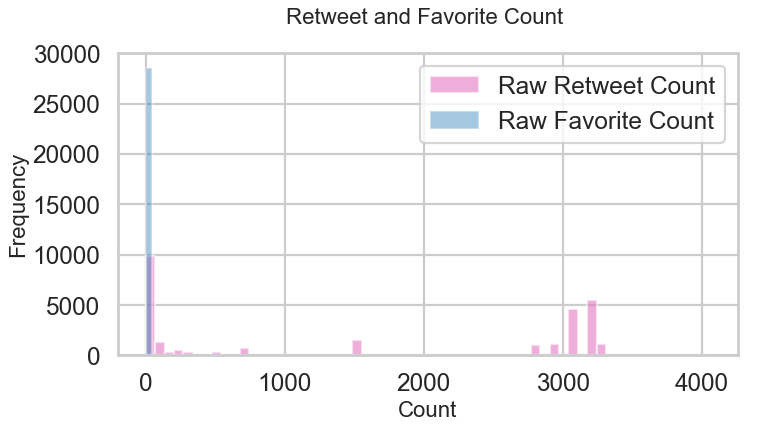

In [18]:
raw_retweet=np.array(df_filtered.TweetRetweetCount)
raw_favorite=np.array(df_filtered.TweetFavoritesCount)
plt.figure(figsize=(10, 5), dpi=80)
plt.hist(raw_retweet, alpha=.6, color='tab:pink', bins=60, label="Raw Retweet Count")
plt.hist(raw_favorite, alpha=.4, color='tab:blue',bins=60, label="Raw Favorite Count")
plt.xlabel('Count', size =20)
plt.ylabel('Frequency', size =20)
plt.title('Retweet and Favorite Count \n', size =20)
plt.legend()
plt.show()

#### custom created  feature : popularity based on formula

In [19]:
popularity = [retweets + favs for retweets, favs in zip(df_filtered.TweetRetweetCount, df_filtered.TweetFavoritesCount)]

In [20]:
# add popularity column to df
df_filtered.loc[:,'popularity']=popularity 
df_filtered.shape

(28593, 33)

In [21]:
dftouse = df_filtered.reset_index()
dftouse.head()

,index,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,TweetHashtags,TweetPlaceID,TweetPlaceName,TweetPlaceFullName,TweetCountry,TweetPlaceBoundingBox,TweetPlaceAttributes,TweetPlaceContainedWithin,UserID,UserName,UserScreenName,UserLocation,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place,popularity
0,0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"Maldives, vacation, travel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3325724261,CjQenterprises,CjQenterprises,United States,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN,1
1,1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"giftideas, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,101222953,monica,mama0004,durham nc,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN,1
2,3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,"yoga, bresil, meditation, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3541532718,Primal Sanctuary,primalsanctuary,"Cypress, Texas, USA","Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN,1
3,4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773556998034063360,Joe,biryukovasever2,Providence,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN,3065
4,5,Tue Dec 20 10:56:52 +0000 2016,811163453041713152,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773757661418586112,Rey,GerasimovArvid,Bismarck,I actually have got great ambitions. I launch ...,NaN,NaN,58,21,23,Thu Sep 08 05:39:37 +0000 2016,17112,0,NaN,3065


In [22]:
dftouse['popularity'].describe()

count    28593.000000
mean      1602.977267
std       1486.501874
min          1.000000
25%         13.000000
50%       1536.000000
75%       3086.000000
max       6122.000000
Name: popularity, dtype: float64

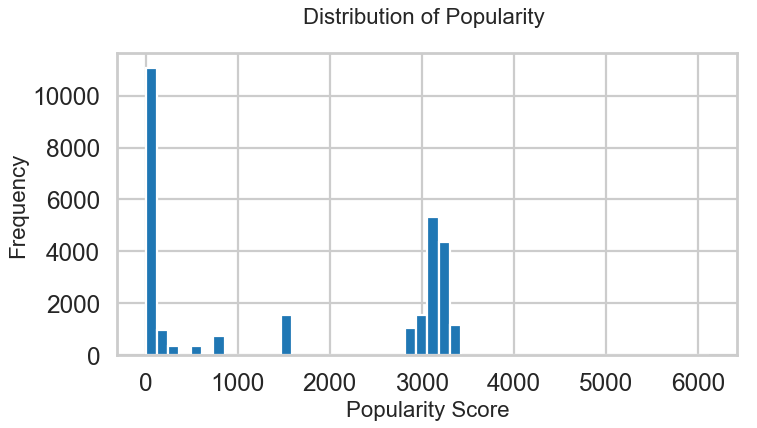

In [23]:
plt.figure(figsize=(10, 5), dpi=80)
plt.hist(dftouse['popularity'],bins=50)
plt.title("Distribution of Popularity \n", size = 20)
plt.xlabel('Popularity Score', size=20)
plt.ylabel('Frequency', size=20)
plt.show()

The distribution of popularity is extremely right-tailed. This makes sense because the distribution of retweet counts and favorite counts are also extremely right-skewed.

### Rethinking how Popularity is scored

We looked more closely at what made up our composite popularity score (favorite count + retweet count), at a statistical summary of retweet count and favorite count to decide if any standardization would be necessary.

We find that the histogram of raw retweet and favorite count appear to have an exponential distribution, so we transformed the data using a log transformation. Since the data was skewed with a disproportionate amount of zeros, a log(1+x) transformation made the most sense to use since, when x=0, log(1)=0. This allowed us to use a log transformation even with the presence of many zeros. The resulting distribution appeared more more normal

### Method 1

Standardize Retweets and Favorites, adding them together to form Popularity Score, then Log Transforming Composite Popularity Score

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log1p
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


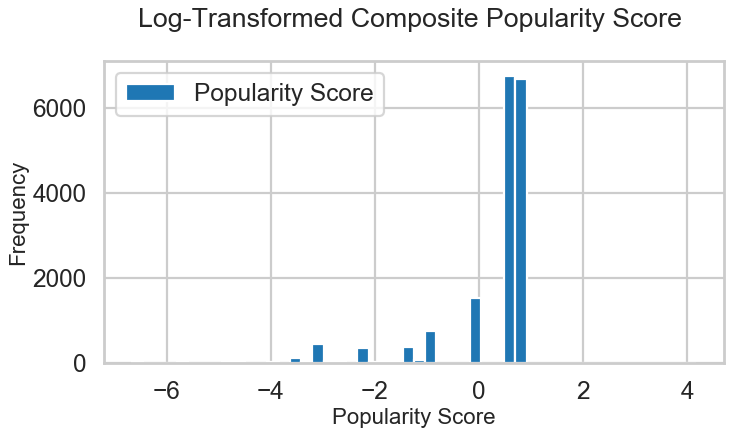

In [24]:
retweet_mean = np.mean(raw_retweet)
retweet_std = np.std(raw_retweet)
z_retweets = [(retweet_count - retweet_mean)/float(retweet_std) for retweet_count in raw_retweet]
dftouse['z_retweets']=z_retweets 

favorite_mean = np.mean(raw_favorite)
favorite_std = np.std(raw_favorite)
z_favorites = [(favorite_count - favorite_mean)/float(favorite_std) for favorite_count in raw_favorite]
dftouse['z_favorites']=z_favorites

z_popularity = [retweets + favs for retweets, favs in zip(z_retweets, z_favorites)]
dftouse['z_popularity']=z_popularity

plt.figure(figsize=(10, 5), dpi=80)
plt.hist(np.log1p(dftouse['z_popularity']), bins=50, label="Popularity Score")
plt.legend()
plt.title('Log-Transformed Composite Popularity Score \n')
plt.xlabel('Popularity Score',size=20)
plt.ylabel('Frequency', size=20)
plt.show()

### Method 2 (what we went with)

Transforming Retweets

In [25]:
dftouse['log_retweet_count']=np.log(raw_retweet)

In [26]:
dftouse['log_retweet_count'].describe()

count    28593.000000
mean         5.406941
std          3.072453
min          0.000000
25%          2.484907
50%          7.336937
75%          8.034631
max          8.307953
Name: log_retweet_count, dtype: float64

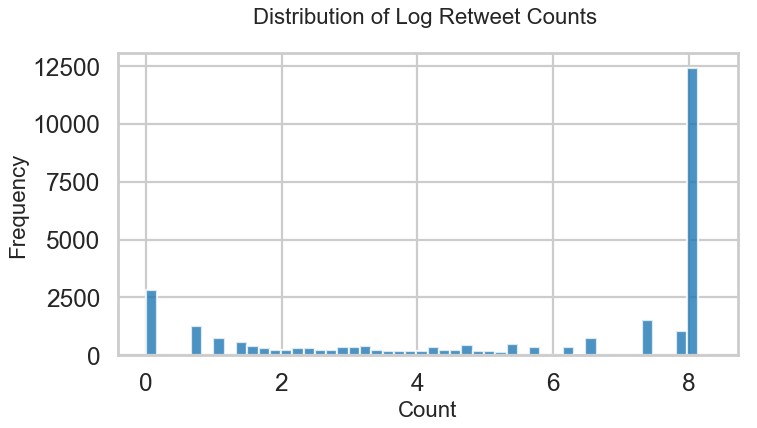

In [27]:
plt.figure(figsize=(10, 5), dpi=80)
plt.hist(dftouse['log_retweet_count'], bins=50, alpha=.8)
plt.title("Distribution of Log Retweet Counts \n", size=20)
plt.xlabel('Count', size=20)
plt.ylabel('Frequency', size=20)
plt.show()

In [28]:
retweet_stats = dftouse['log_retweet_count'].describe()
retweet_mean = retweet_stats[1]
retweet_std = retweet_stats[2]

### Transforming Favorites

In [29]:
dftouse['log_favorite_count']=np.log1p(dftouse['TweetFavoritesCount'])

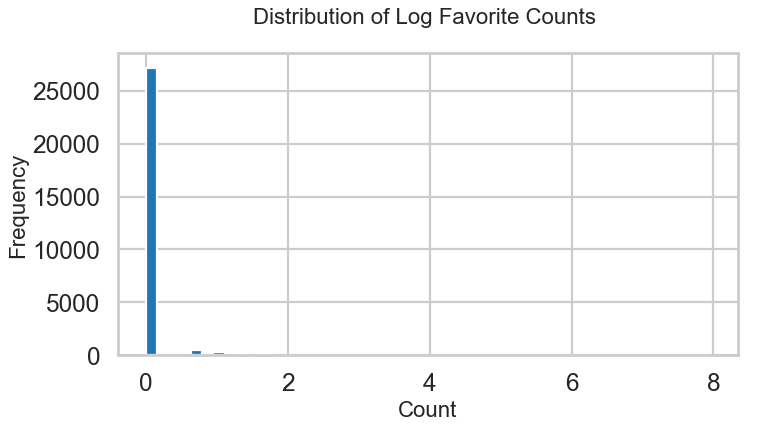

In [30]:
plt.figure(figsize=(10, 5), dpi=80)
plt.hist(dftouse['log_favorite_count'],bins=50)
plt.title("Distribution of Log Favorite Counts \n", size=20)
plt.xlabel('Count', size=20)
plt.ylabel('Frequency', size=20)
plt.show()

In [31]:
dftouse['log_favorite_count'].describe()

count    28593.000000
mean         0.069933
std          0.368970
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.942362
Name: log_favorite_count, dtype: float64

In [32]:
favorite_stats = dftouse['log_favorite_count'].describe()
favorite_mean = favorite_stats[1]
favorite_std = favorite_stats[2]

Given these statistics on retweet_count and favorite_count, we realize we want to standardize these two for use later on, otherwise since there are way more retweets than favorites, retweets would get weighted more heavily. 

In [33]:
dftouse = dftouse.rename(columns={'retweet_count': 'retweet_unstandardized', 'favorite_count': 'favorite_unstandardized'})

### Create standardized retweet_count and favorite_count 

We decided to use a z-score to standardize retweet counts and favorite counts before adding them together to create the composite popularity score. Using that method, we standardize retweet count and favorites by subtracting the mean and dividing by the standard deviation.

In [34]:
retweets = [(retweet_count - retweet_mean)/float(retweet_std) for retweet_count in dftouse['log_retweet_count']]

In [35]:
favorites = [(favorite_count - favorite_mean)/float(favorite_std) for favorite_count in dftouse['log_favorite_count']]

In [36]:
#  Now we add these as columns to our dftouse

dftouse.loc[:,'retweet_count']=retweets

In [37]:
dftouse.loc[:,'favorite_count']=favorites

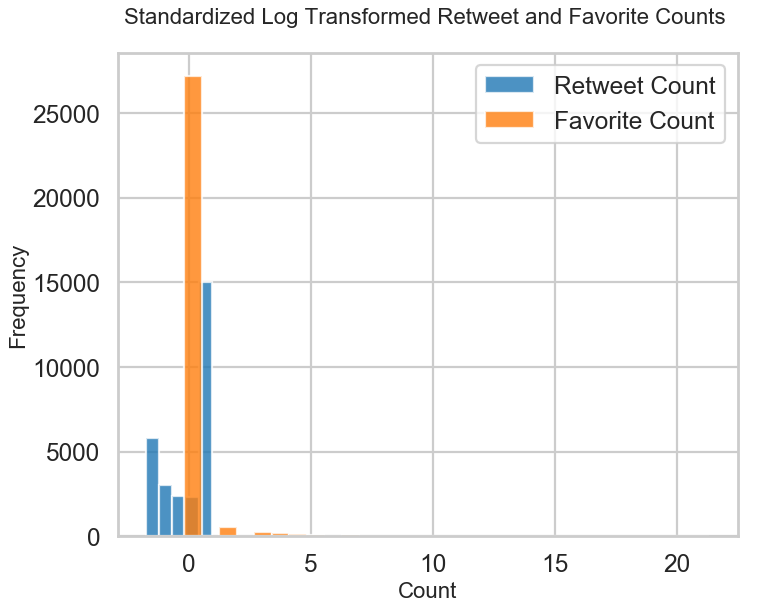

In [124]:
plt.figure(figsize=(10, 8), dpi=80)
plt.hist(dftouse.retweet_count, alpha=.8, bins=5,  label="Retweet Count")
plt.hist(dftouse.favorite_count, alpha=.8, bins=30, label="Favorite Count")
plt.legend()
plt.xlabel('Count', size=20)
plt.ylabel('Frequency',size=20)
plt.title('Standardized Log Transformed Retweet and Favorite Counts \n', size=20)
plt.show()

In [39]:
print(dftouse.retweet_count.describe())

count    2.859300e+04
mean    -1.076027e-13
std      1.000000e+00
min     -1.759813e+00
25%     -9.510428e-01
50%      6.281614e-01
75%      8.552420e-01
max      9.442007e-01
Name: retweet_count, dtype: float64


In [40]:
print(dftouse.favorite_count.describe())

count    2.859300e+04
mean     6.984766e-15
std      1.000000e+00
min     -1.895351e-01
25%     -1.895351e-01
50%     -1.895351e-01
75%     -1.895351e-01
max      2.133625e+01
Name: favorite_count, dtype: float64


In [41]:
# Now we recalculate popularity, but in the same way as before.

zlogpopularity = [retweets + favs for retweets, favs in zip(dftouse.retweet_count, dftouse.favorite_count)]
dftouse.loc[:,'logpopularity']=zlogpopularity

In [42]:
dftouse['logpopularity'].describe()

count    2.859300e+04
mean    -1.160224e-13
std      1.222545e+00
min     -1.949348e+00
25%     -9.149773e-01
50%      6.376362e-01
75%      6.754728e-01
max      2.221420e+01
Name: logpopularity, dtype: float64

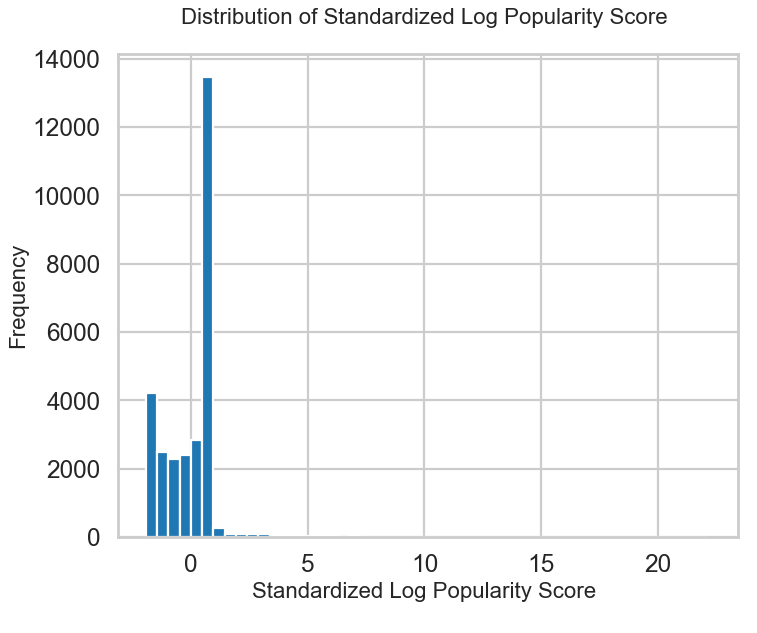

In [43]:
plt.figure(figsize=(10, 8), dpi=80)
plt.hist(dftouse['logpopularity'], bins=50)
plt.xlabel('Standardized Log Popularity Score \n', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Distribution of Standardized Log Popularity Score \n', size=20)
plt.show()

We also considered using two other methods but chose not to go with them either because there was no significant difference in the resulting shape of the distribution or because the distribution didn't make sense given the data. One of the rejected methods that we considered but didn't go with was adding retweet and favorite counts, taking the log transformation of the composite popularity score, and then taking the z-score, but we realized that the shape of the distribution did not significantly differ from Method 2. There was also no reason to take the z-score after taking the log-transformation of the data. Another method that we considered was winsorizing the data at 90% which would see all data below the 5th percentile set to the 5th percentile, and data above the 95th percentile set to the 95th percentile. Although the resulting distribution looked more normal, we felt like too many zeros had been taken out.

#### For conveniance, the standardized log popularity will just be labeled the log popularity score from here on out.

### Hashtag Analysis

In [44]:
dftouse.columns

Index(['index', 'TweetPostedTime', 'TweetID', 'TweetBody', 'TweetRetweetFlag', 'TweetSource', 'TweetInReplyToStatusID', 'TweetInReplyToUserID', 'TweetInReplyToScreenName', 'TweetRetweetCount', 'TweetFavoritesCount', 'TweetHashtags', 'TweetPlaceID', 'TweetPlaceName', 'TweetPlaceFullName', 'TweetCountry', 'TweetPlaceBoundingBox', 'TweetPlaceAttributes', 'TweetPlaceContainedWithin', 'UserID', 'UserName', 'UserScreenName', 'UserLocation', 'UserDescription', 'UserLink', 'UserExpandedLink',
       'UserFollowersCount', 'UserFriendsCount', 'UserListedCount', 'UserSignupDate', 'UserTweetCount', 'MacroIterationNumber', 'tweet.place', 'popularity', 'z_retweets', 'z_favorites', 'z_popularity', 'log_retweet_count', 'log_favorite_count', 'retweet_count', 'favorite_count', 'logpopularity'],
      dtype='object')

In [45]:
dftouse.head(3)

,index,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,TweetHashtags,TweetPlaceID,TweetPlaceName,TweetPlaceFullName,TweetCountry,TweetPlaceBoundingBox,TweetPlaceAttributes,TweetPlaceContainedWithin,UserID,UserName,UserScreenName,UserLocation,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place,popularity,z_retweets,z_favorites,z_popularity,log_retweet_count,log_favorite_count,retweet_count,favorite_count,logpopularity
0,0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"Maldives, vacation, travel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3325724261,CjQenterprises,CjQenterprises,United States,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN,1,-1.07784,-0.023225,-1.101065,0.0,0.0,-1.759813,-0.189535,-1.949348
1,1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"giftideas, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,101222953,monica,mama0004,durham nc,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN,1,-1.07784,-0.023225,-1.101065,0.0,0.0,-1.759813,-0.189535,-1.949348
2,3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,"yoga, bresil, meditation, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3541532718,Primal Sanctuary,primalsanctuary,"Cypress, Texas, USA","Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN,1,-1.07784,-0.023225,-1.101065,0.0,0.0,-1.759813,-0.189535,-1.949348


#### Created hashtag_count for further processing 

In [46]:
dftouse['hashtag_count'] = dftouse['TweetHashtags'].apply(lambda x: len(str(x).split(',')))

In [47]:
#What fraction of tweets in the sample use hashtags?

num_tags_per_tweet = dftouse['hashtag_count']
tags_per_tweet = np.array(num_tags_per_tweet)
tagfrac = float(len(tags_per_tweet[tags_per_tweet>0]))/float(len(tags_per_tweet))
print(str(tagfrac)+" of tweets in the sample use one or more hashtags.")

1.0 of tweets in the sample use one or more hashtags.


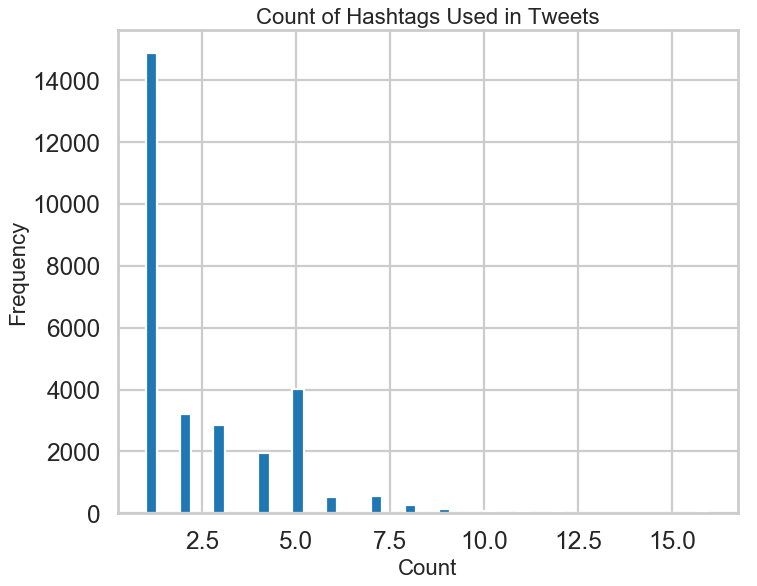

In [48]:
plt.figure(figsize=(10, 8), dpi=80)
plt.hist((tags_per_tweet), bins=50)
plt.xlabel('Count', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Count of Hashtags Used in Tweets', size=20)
plt.show()

#### Top 10 hashtags

First get a flattened list of all the hashtags used in the sample:

In [49]:
dftouse.head()

,index,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,TweetHashtags,TweetPlaceID,TweetPlaceName,TweetPlaceFullName,TweetCountry,TweetPlaceBoundingBox,TweetPlaceAttributes,TweetPlaceContainedWithin,UserID,UserName,UserScreenName,UserLocation,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place,popularity,z_retweets,z_favorites,z_popularity,log_retweet_count,log_favorite_count,retweet_count,favorite_count,logpopularity,hashtag_count
0,0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"Maldives, vacation, travel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3325724261,CjQenterprises,CjQenterprises,United States,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN,1,-1.077840,-0.023225,-1.101065,0.000000,0.0,-1.759813,-0.189535,-1.949348,3
1,1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"giftideas, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,101222953,monica,mama0004,durham nc,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN,1,-1.077840,-0.023225,-1.101065,0.000000,0.0,-1.759813,-0.189535,-1.949348,2
2,3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,"yoga, bresil, meditation, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3541532718,Primal Sanctuary,primalsanctuary,"Cypress, Texas, USA","Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN,1,-1.077840,-0.023225,-1.101065,0.000000,0.0,-1.759813,-0.189535,-1.949348,4
3,4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773556998034063360,Joe,biryukovasever2,Providence,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN,3065,0.985031,-0.023225,0.961805,8.027803,0.0,0.853020,-0.189535,0.663484,1
4,5,Tue Dec 20 10:56:52 +0000 2016,811163453041713152,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773757661418586112,Rey,GerasimovArvid,Bismarck,I actually have got great ambitions. I launch ...,NaN,NaN,58,21,23,Thu Sep 08 05:39:37 +0000 2016,17112,0,NaN,3065,0.985031,-0.023225,0.961805,8.027803,0.0,0.853020,-0.189535,0.663484,1


In [50]:
# my_string =  "[" + dftouse['TweetHashtags'] + "]"

# li = []
# for i in my_string:
#     li.append(str(i))

# dftouse["my_string"] = li

#dftouse['my_string'] = dftouse['my_string'].apply(lambda x: x.lower()) 

In [51]:
alltags = dftouse['TweetHashtags'].tolist()

alltags = [str(x).lower() for x in alltags]

# from functools import reduce
# col_one_flat_list = reduce(operator.concat, col_one_list)

In [52]:
flat_list = []
for sublist in alltags:
    for item in sublist.split(','):
        flat_list.append((item))

In [53]:
def strip_the_poem(lines):
  y = []
  for line in lines:
    y.append(line.strip())
  return y

hashtags =  strip_the_poem(flat_list)

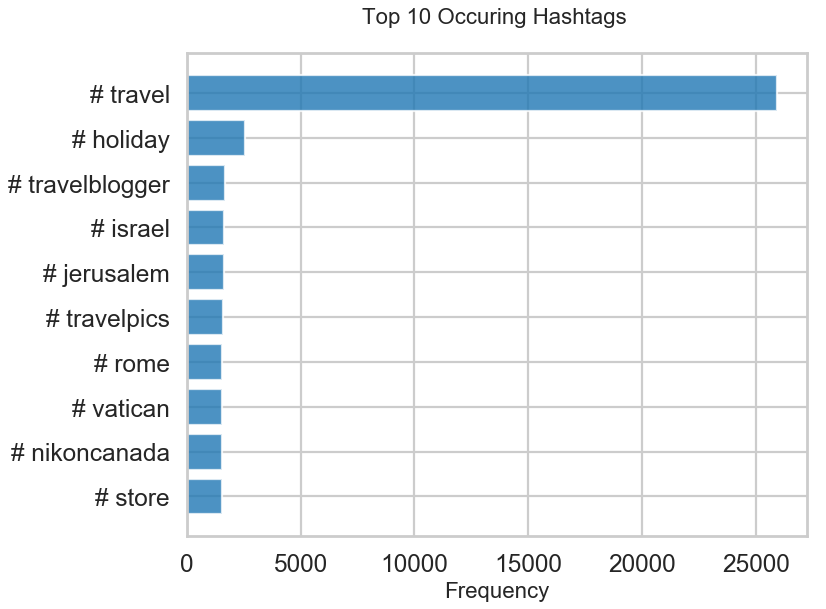

In [54]:
hashfreq = Counter(hashtags) # get the frequency of appearing hashtags
commontags = hashfreq.most_common(10) # save the top ten most common hashtags
taglabels = list(zip(*commontags))[0][::-1] # reverse the tuples to go from most frequent to least frequent 
hashtaglabels = ['# '+i for i in taglabels] # add a pound sign in front of each tag to make it clear that it's a hashtag
y_pos = np.arange(len(hashtaglabels)) 
usefreq = list(zip(*commontags))[1][::-1] # get the frequency part of the tuple

plt.figure(figsize=(10, 8), dpi=80)
plt.barh(y_pos, usefreq, align='center', alpha=0.8) # plot horizontal barplot
plt.yticks(y_pos, hashtaglabels) 
plt.xlabel('Frequency', size=20)
plt.title('Top 10 Occuring Hashtags \n', size=20)
plt.show()

In [55]:
top4 = hashfreq.most_common(4)
tagdf = pd.DataFrame(dict(alltags=alltags, popularity=dftouse['logpopularity']))

for hashtag, _ in top4:
    tagdf[hashtag] = [hashtag in hashtags for hashtags in alltags]

tagdf['populartags']=tagdf[['travel','holiday','travelblogger','israel']].sum(axis=1)
tagdf.head()

,alltags,popularity,travel,holiday,travelblogger,israel,populartags
0,"maldives, vacation, travel",-1.949348,True,False,False,False,1
1,"giftideas, holiday",-1.949348,False,True,False,False,1
2,"yoga, bresil, meditation, holiday",-1.949348,False,True,False,False,1
3,travel,0.663484,True,False,False,False,1
4,travel,0.663484,True,False,False,False,1


In [56]:
for column in ['travel','holiday','travelblogger','israel']:
    dftouse[column] = tagdf[column]
    
dftouse.head()

,index,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,TweetHashtags,TweetPlaceID,TweetPlaceName,TweetPlaceFullName,TweetCountry,TweetPlaceBoundingBox,TweetPlaceAttributes,TweetPlaceContainedWithin,UserID,UserName,UserScreenName,UserLocation,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place,popularity,z_retweets,z_favorites,z_popularity,log_retweet_count,log_favorite_count,retweet_count,favorite_count,logpopularity,hashtag_count,travel,holiday,travelblogger,israel
0,0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"Maldives, vacation, travel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3325724261,CjQenterprises,CjQenterprises,United States,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN,1,-1.077840,-0.023225,-1.101065,0.000000,0.0,-1.759813,-0.189535,-1.949348,3,True,False,False,False
1,1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"giftideas, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,101222953,monica,mama0004,durham nc,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN,1,-1.077840,-0.023225,-1.101065,0.000000,0.0,-1.759813,-0.189535,-1.949348,2,False,True,False,False
2,3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,"yoga, bresil, meditation, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3541532718,Primal Sanctuary,primalsanctuary,"Cypress, Texas, USA","Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN,1,-1.077840,-0.023225,-1.101065,0.000000,0.0,-1.759813,-0.189535,-1.949348,4,False,True,False,False
3,4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773556998034063360,Joe,biryukovasever2,Providence,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN,3065,0.985031,-0.023225,0.961805,8.027803,0.0,0.853020,-0.189535,0.663484,1,True,False,False,False
4,5,Tue Dec 20 10:56:52 +0000 2016,811163453041713152,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773757661418586112,Rey,GerasimovArvid,Bismarck,I actually have got great ambitions. I launch ...,NaN,NaN,58,21,23,Thu Sep 08 05:39:37 +0000 2016,17112,0,NaN,3065,0.985031,-0.023225,0.961805,8.027803,0.0,0.853020,-0.189535,0.663484,1,True,False,False,False


### tweeting popular topics 

Even if tweeting about a topic defined in this case as a hashtag that occurs

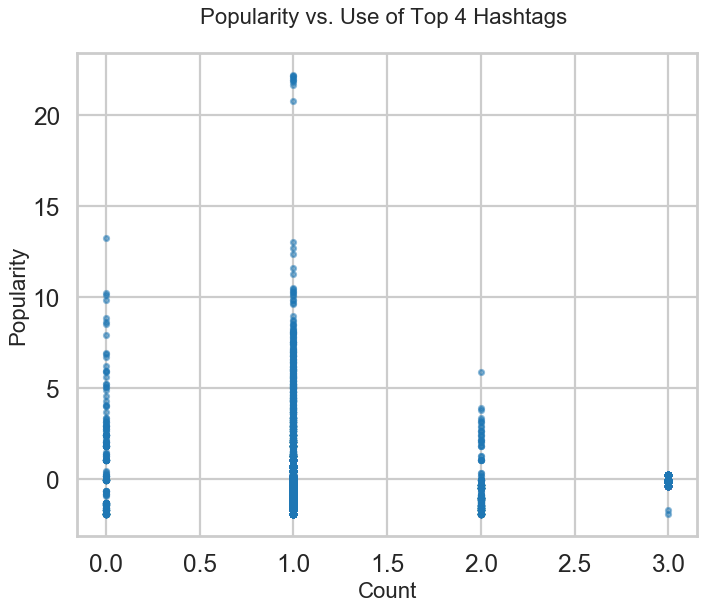

In [57]:
plt.figure(figsize=(10, 8), dpi=80)
plt.title('Popularity vs. Use of Top 4 Hashtags \n', size=20)
plt.ylabel('Popularity', size=20)
plt.xlabel('Count', size=20)
plt.scatter(tagdf['populartags'], tagdf['popularity'], alpha=0.5, marker='o', cmap='viridis', s=20)
plt.show()

### Number of Hashtags vs. Popularity Score

In [58]:
from scipy.stats.stats import pearsonr

(-0.3076653988120189, 0.0)


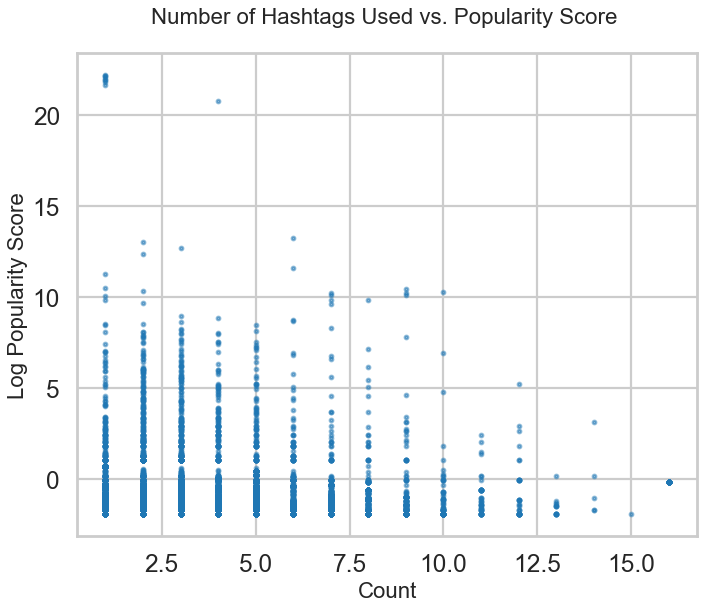

In [59]:
print(pearsonr(dftouse['hashtag_count'],dftouse['logpopularity']))

plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(dftouse['hashtag_count'],dftouse['logpopularity'], alpha=0.5, marker='o', cmap='viridis', s=10)
plt.title('Number of Hashtags Used vs. Popularity Score \n', size=20)
plt.xlabel('Count', size = 20)
plt.ylabel('Log Popularity Score', size = 20)
plt.show()

### Correlation between length of tweet and popularity

(0.13929812780206208, 7.521160096944204e-124)


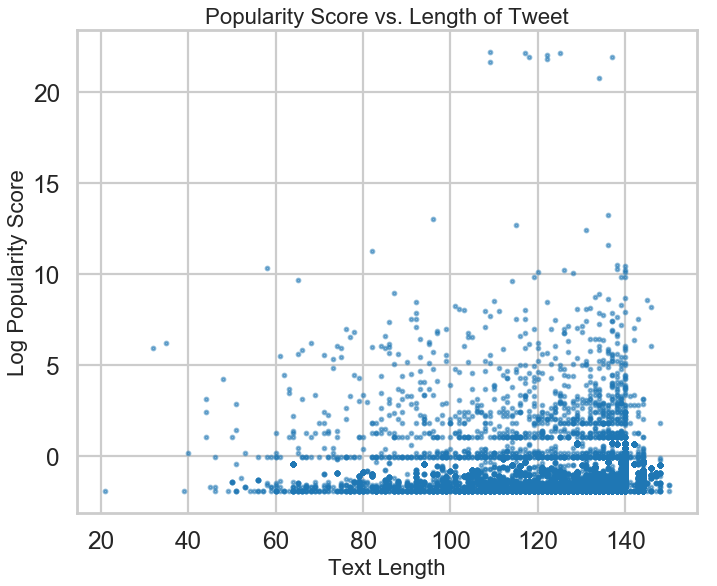

In [60]:
tweet_len = [len(text) for text in dftouse['TweetBody']]
print(pearsonr(tweet_len,dftouse['logpopularity']))

plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(tweet_len,dftouse['logpopularity'], alpha=0.5, marker='o', cmap='viridis', s=10)
plt.title('Popularity Score vs. Length of Tweet', size=20)
plt.ylabel('Log Popularity Score', size=20)
plt.xlabel('Text Length', size=20)
plt.show()

The some tweets are longer than 100 characters because tweets using emojiis are converted into unicode characters, which is being counted into tweet length. The below text shows a tweet that uses emojiis. The distribution of tweet length appears fairly uniform so we decided not to remove emojii text from the analysis. In addition, fewer than 5% of our tweets went over the 140 character mark, so we decided that the effect was negligible.

In [61]:
tweet_len_array = np.array(tweet_len)
idx = np.where(tweet_len_array > 140)[0].tolist()

df_filtered_by_length = dftouse['TweetBody'].filter(idx).copy()
df_over140 = df_filtered_by_length.reset_index()
df_over140['TweetBody'][0]

'RT @TechTerraEd: Need #giftideas for your kid(s)? Read our Top 25 #holiday Gift Picks List. Share &amp; email us for a chance to win one! https…'

In [62]:
# number of tweets that use emojiis
float(len(idx))/float(len(dftouse))

0.0696324275172245

### Correlation between presence of urls and popularity

Dataframe only has information about urls and it would have been too complex to differntiate between images links and other links, so differentiating between images and other urls for this. It appears that having more than one link is correlated with decreased popularity scores.

In [63]:
dftouse['url_count'] = dftouse['UserLink'].apply(lambda x: len(str(x)))

dftouse['url_count'] = np.where(dftouse['url_count']==3, 0, 1)

(-0.3303255938194115, 0.0)


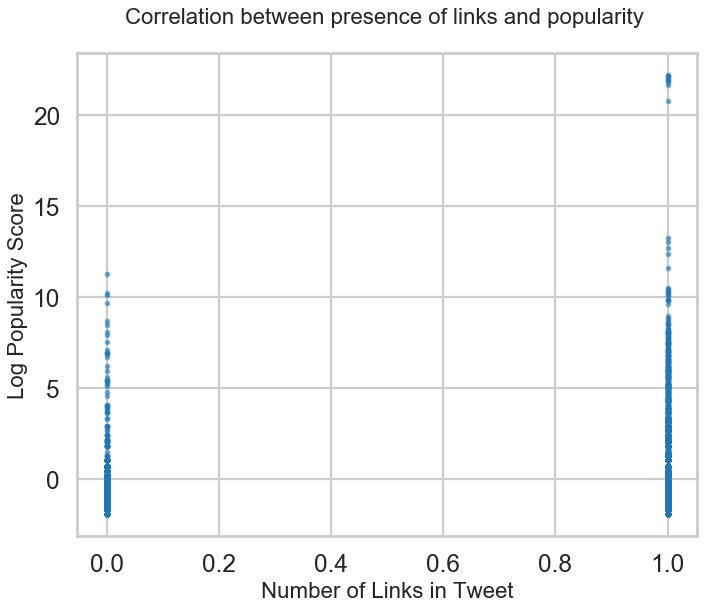

In [64]:
print (pearsonr(dftouse['url_count'],dftouse['logpopularity']))

plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(dftouse['url_count'],dftouse['logpopularity'], alpha=0.5,  s=10)
plt.title('Correlation between presence of links and popularity \n', size=20)
plt.xlabel('Number of Links in Tweet', size=20)
plt.ylabel('Log Popularity Score', size=20)
plt.show()

### Location

Originally we had planned to do exploratory analysis on popular topics that people tweet about by city or state, but after taking a look at our data, we found that 0.5% of tweets were geo-tagged and city details are not provided.

#### Fraction of Tweets that are Geo-tagged

In [65]:
totaltweets = float(len(dftouse['TweetCountry'])) # total number of tweets in sample
countryfrac = float(sum(map(lambda r: int(isinstance(r, str)), dftouse['TweetCountry'])))/totaltweets

print(str(countryfrac) + " of tweets in the sample are geo-tagged with a country.")

0.0035673066834539923 of tweets in the sample are geo-tagged with a country.


### Tweet Post time

In [66]:
# used for extract date and time from TweetPostedTime feature

dftouse['dm'] = dftouse['TweetPostedTime'].str[3:10]
dftouse['t'] = dftouse['TweetPostedTime'].str[10:19]
dftouse['y'] = dftouse['TweetPostedTime'].str[25:]
dftouse['created_at'] = dftouse['dm'].astype(str)+' '+dftouse['y']+' '+dftouse['t']

dftouse["hour_posted"] = dftouse['TweetPostedTime'].str[10:13]

dftouse['created_at']= pd.to_datetime(dftouse['created_at']) 

dftouse = dftouse.drop(['dm', 't', 'y'], axis = 1)

In [67]:
date_objects = [datetime.strptime(str(each), '%Y-%m-%d %H:%M:%S') for each in dftouse['created_at']]

Stopped analysis as we got only one day records

### tweets posted during the day?

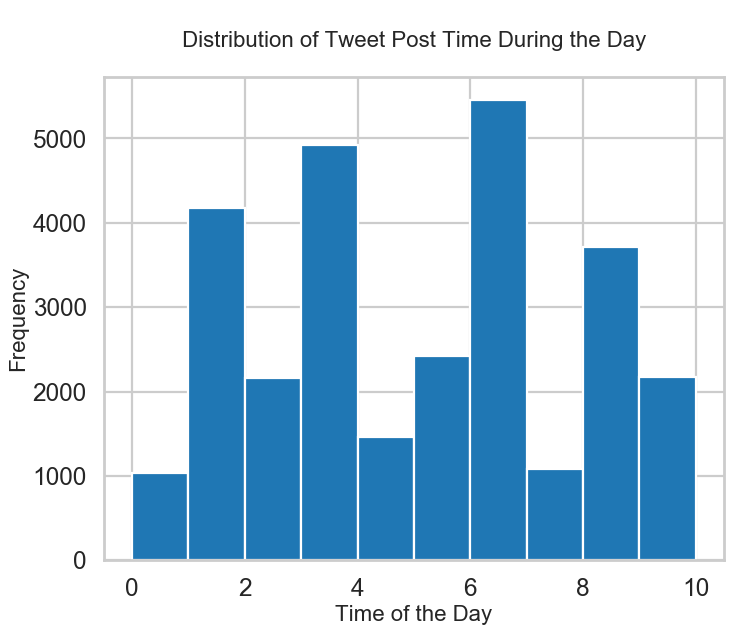

In [68]:
hour_objects = [each.hour for each in date_objects]

plt.figure(figsize=(10, 8), dpi=80)
plt.hist(hour_objects)
plt.title("\n Distribution of Tweet Post Time During the Day \n", size = 20)
plt.xlabel('Time of the Day', size=20)
plt.ylabel('Frequency', size=20)
plt.show()

A histogram is helpful, but a polar histogram could possibly visualize our data in a more intuitive way. 

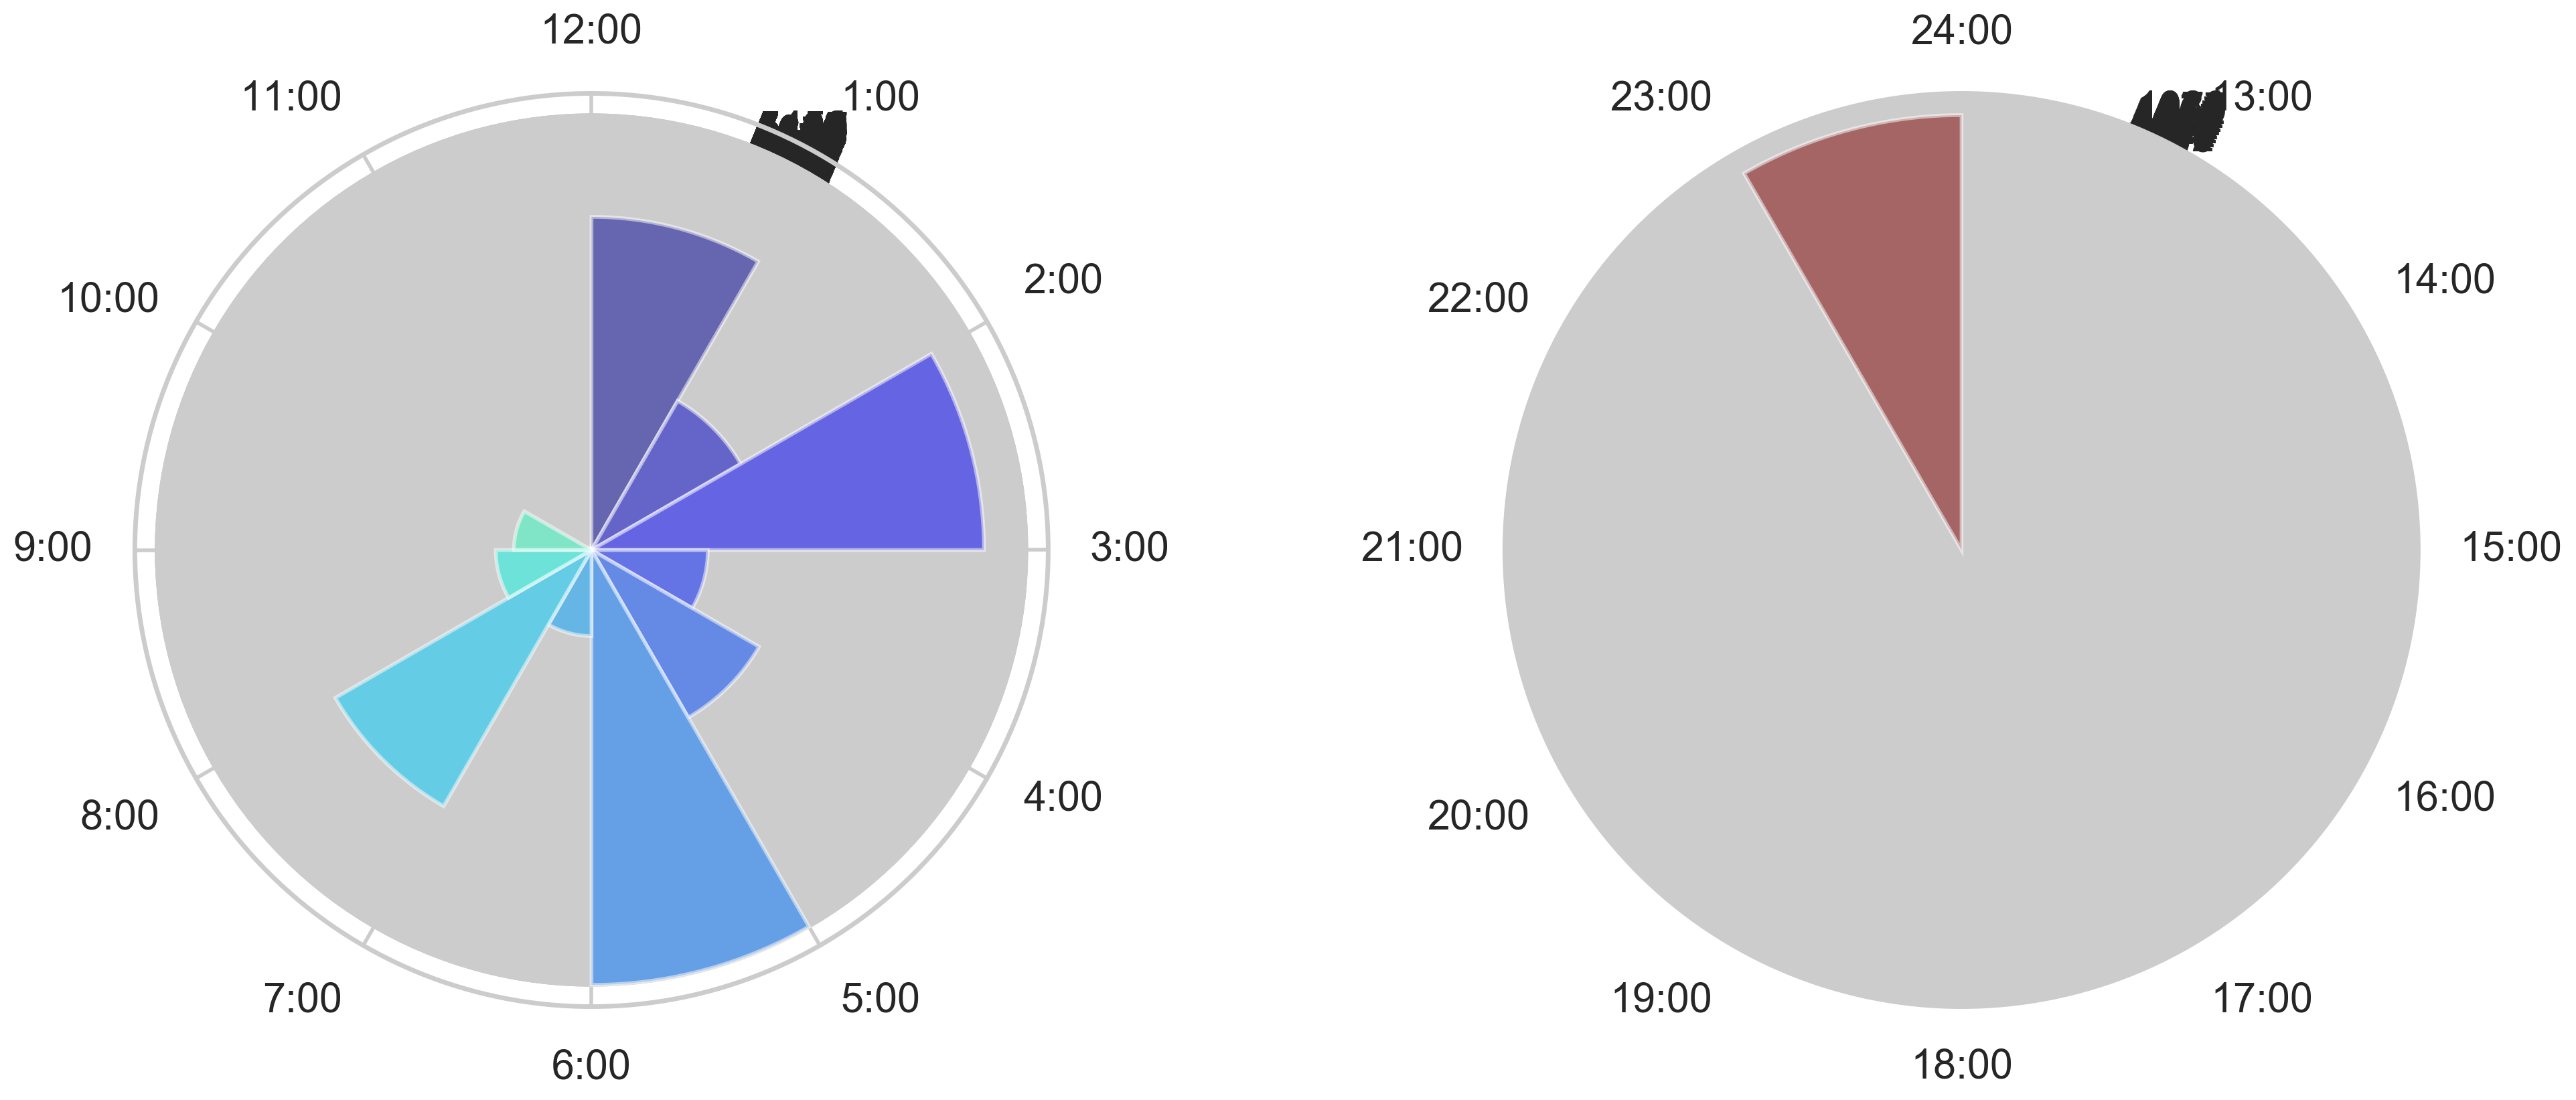

In [69]:
import matplotlib.ticker as tkr

def main():
    data = hour_objects
    axes = plot_clock(data)
    for ax in axes:
        realign_polar_xticks(ax)
    plt.show()

def realign_polar_xticks(ax):
    pass
    for theta, label in zip(ax.get_xticks(), ax.get_xticklabels()):
        theta = theta * ax.get_theta_direction() + ax.get_theta_offset()
        theta = np.pi/2 - theta
        y, x = np.cos(theta), np.sin(theta)
        if x >= 0.1:
            label.set_horizontalalignment('left')
        if x <= -0.1:
            label.set_horizontalalignment('right')
        if y >= 0.5:
            label.set_verticalalignment('bottom')
        if y <= -0.5:
            label.set_verticalalignment('top')

def plot_clock(data):
    def hour_formatAM(x, p):
        hour = x * 6 / np.pi
        return '{:0.0f}:00'.format(hour) if x > 0 else '12:00'

    def hour_formatPM(x, p):
        hour = x * 6 / np.pi
        return '{:0.0f}:00'.format(hour + 12) if x > 0 else '24:00'

    def plot(ax, theta, counts, formatter):
        colors = plt.cm.jet(theta / 12.0)
        ax.bar(theta, counts, width=np.pi/6, color=colors, alpha=0.5)
        ax.xaxis.set_major_formatter(tkr.FuncFormatter(formatter))

    plt.rcParams['font.size'] = 8

    bins = np.r_[0, 0.5:12, 12, 12.5:24,  23.99999]
    counts = np.histogram(data,bins)[0]

    counts[13] += counts[0]
    counts[-1] += counts[13]

    fig, axes = plt.subplots(ncols=2, figsize=(22, 12), dpi=200,
                             subplot_kw=dict(projection='polar'))
    fig.subplots_adjust(wspace=0.5)

    for ax in axes:
        ax.set(theta_offset=np.pi/2, theta_direction=-1,
               xticks=np.arange(0, np.pi*2, np.pi/6),
               yticks=np.arange(1, counts.max()))

    plot(axes[0], bins[1:13] * np.pi / 6, counts[1:13], hour_formatAM)
    plot(axes[1], bins[14:26] * np.pi / 6, counts[14:26], hour_formatPM)
    return axes

main()

#### Correlation between time of day and tweet popularity


There does not appear to be a clear relationship between the time of day that a tweet is created and its popularity score. There does appear to be some cyclical change, but it's hard to tell based on the correlation.

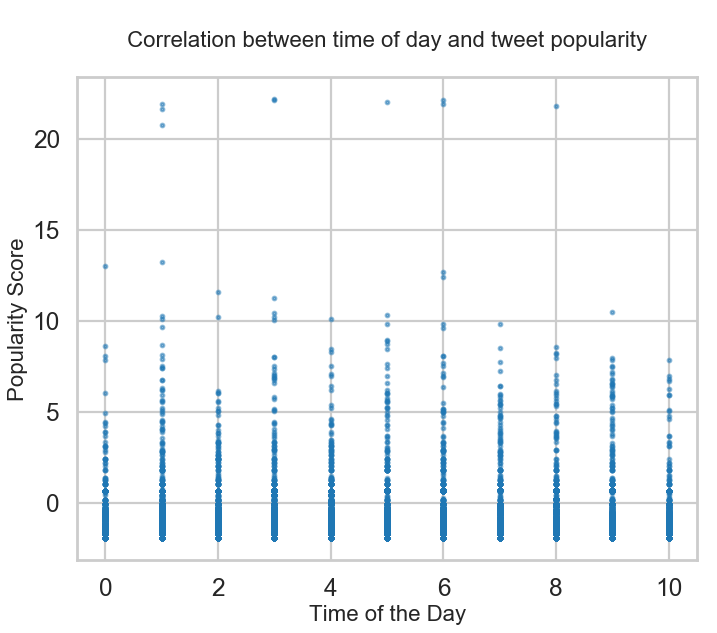

In [70]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(hour_objects, dftouse['logpopularity'], alpha=0.5,  s=10)
plt.title(" \n Correlation between time of day and tweet popularity \n", size=20)
plt.xlabel('Time of the Day', size=20)
plt.ylabel('Popularity Score', size=20)
plt.show()

 Since there does appear to be a slight relationship, we will include this in the prediction model. 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


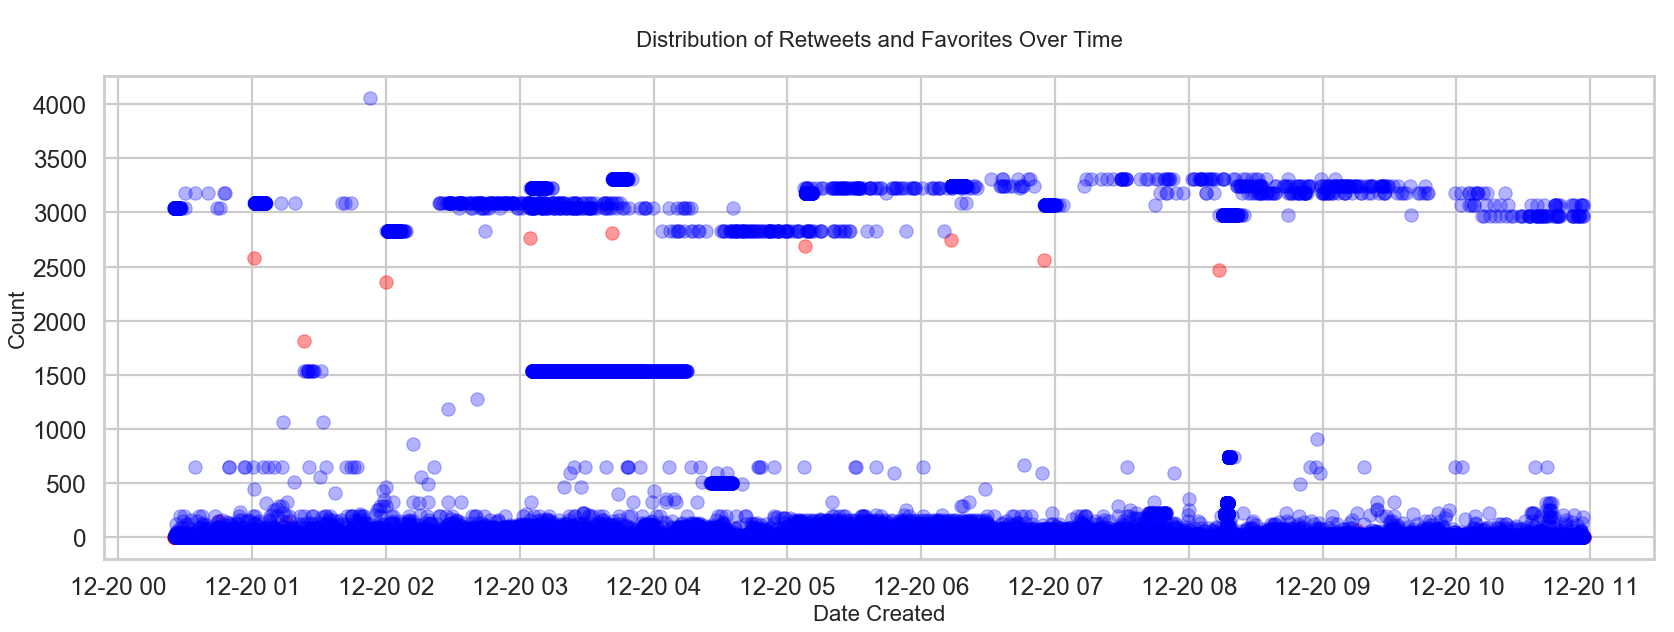

In [71]:
plt.figure(figsize=(25, 8), dpi=80)
plt.plot_date(date_objects, raw_favorite, alpha=.4, color='r')
plt.plot_date(date_objects, raw_retweet, alpha=.3, color='b')
plt.ylabel('Count', size=20)
plt.xlabel('Date Created', size=20)
plt.title('\n Distribution of Retweets and Favorites Over Time \n', size=20)
plt.show()

#### User's followers correlated with popularity

There is a low correlation (p-value < .5) between how many followers a user has and the popularity score for a single tweet by that user.

(0.11586983899582204, 4.9036235979501946e-86)


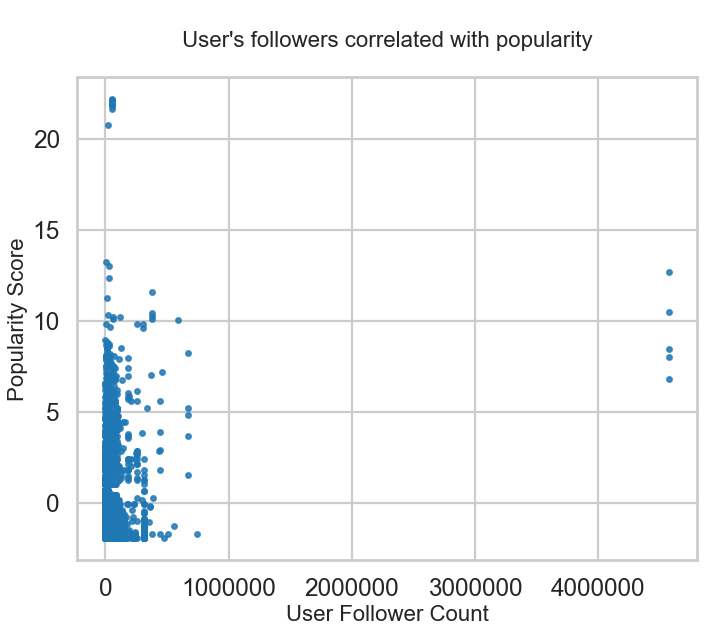

In [72]:
user_follower_count = dftouse['UserFollowersCount'] 
print(pearsonr(user_follower_count,dftouse['logpopularity']))
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(user_follower_count,dftouse['logpopularity'],  alpha=0.8,  s=18)
plt.ylabel('Popularity Score', size=20)
plt.xlabel('User Follower Count', size=20)
plt.title("\n User's followers correlated with popularity \n", size=20)
plt.show()

### Sentiment Analysis

Skip sentiment analyisi as postive and negative word files are not provided

### Prediction

In [73]:
dftouse.head()

,index,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,TweetHashtags,TweetPlaceID,TweetPlaceName,TweetPlaceFullName,TweetCountry,TweetPlaceBoundingBox,TweetPlaceAttributes,TweetPlaceContainedWithin,UserID,UserName,UserScreenName,UserLocation,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place,popularity,z_retweets,z_favorites,z_popularity,log_retweet_count,log_favorite_count,retweet_count,favorite_count,logpopularity,hashtag_count,travel,holiday,travelblogger,israel,url_count,created_at,hour_posted
0,0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"Maldives, vacation, travel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3325724261,CjQenterprises,CjQenterprises,United States,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN,1,-1.077840,-0.023225,-1.101065,0.000000,0.0,-1.759813,-0.189535,-1.949348,3,True,False,False,False,1,2016-12-20 10:57:00,10
1,1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,"giftideas, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,101222953,monica,mama0004,durham nc,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN,1,-1.077840,-0.023225,-1.101065,0.000000,0.0,-1.759813,-0.189535,-1.949348,2,False,True,False,False,0,2016-12-20 10:56:59,10
2,3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,"yoga, bresil, meditation, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3541532718,Primal Sanctuary,primalsanctuary,"Cypress, Texas, USA","Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN,1,-1.077840,-0.023225,-1.101065,0.000000,0.0,-1.759813,-0.189535,-1.949348,4,False,True,False,False,1,2016-12-20 10:56:55,10
3,4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773556998034063360,Joe,biryukovasever2,Providence,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN,3065,0.985031,-0.023225,0.961805,8.027803,0.0,0.853020,-0.189535,0.663484,1,True,False,False,False,0,2016-12-20 10:56:53,10
4,5,Tue Dec 20 10:56:52 +0000 2016,811163453041713152,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773757661418586112,Rey,GerasimovArvid,Bismarck,I actually have got great ambitions. I launch ...,NaN,NaN,58,21,23,Thu Sep 08 05:39:37 +0000 2016,17112,0,NaN,3065,0.985031,-0.023225,0.961805,8.027803,0.0,0.853020,-0.189535,0.663484,1,True,False,False,False,0,2016-12-20 10:56:52,10


### Model 1

In [75]:
formula2 = 'logpopularity ~ travel + holiday + travelblogger + israel + url_count + user_follower_count + hour_posted'
model2 = ols(formula2, dftouse).fit()
print("R^2:", model2.rsquared)

R^2: 0.2019341277183001


### Model 2

In [74]:
from statsmodels.formula.api import glm, ols
formula1 = 'logpopularity ~ TweetHashtags + url_count + UserFollowersCount'
model1 = ols(formula1, dftouse).fit()
print("R^2:", model1.rsquared)

R^2: 0.5050389255377854


### Model 3 

model popularity as a function of features of the tweet and the user that posted it. Hashtags and urls, time of posting are all features that can affect how many people see the tweet and the likelihood of a user retweeting and thus expanding the number of users who see the tweet. We also use the user's follower count as a feature to account for users whose higher follower counts means that their initial audience is larger to begin with and can skew their popularity score compared to users with lower follower counts.

In [108]:
formula3 = 'logpopularity ~ TweetHashtags + url_count + UserFollowersCount + hour_posted'
model3 = ols(formula3, dftouse).fit()
print("R^2:", model3.rsquared)

R^2: 0.5184959224270065


In [110]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          logpopularity   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     8.394
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:48:30   Log-Likelihood:                -35771.
No. Observations:               28567   AIC:                         7.804e+04
Df Residuals:                   25318   BIC:                         1.049e+05
Df Model:                        3248                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================================================================
                                                                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                                         0.0803      0.900      0.089      0.929      -1.684       1.845
TweetHashtags[T.30SecondMom, holiday, recipes]                                                                                                   -2.0580      1.101     -1.869      0.062      -4.216       0.100
TweetHashtags[T.30agetaway, Southwaltongetaway, santarosabeach, southwalton, 30a]                                                                -2.3750      1.272     -1.867      0.062      -4.868       0.118
TweetHashtags[T.3dModelling, holiday, gear, pinion]                                                                                              -1.3991      1.273     -1.099      0.272      -3.893       1.095
TweetHashtags[T.3weather, travel]                                                                                                                -1.5285      1.039     -1.471      0.141      -3.565       0.508
TweetHashtags[T.49thCanadaExpressEntry, Opulentus, Travel, CanadaImmigration]                                                                    -0.4358      0.986     -0.442      0.659      -2.369       1.497
TweetHashtags[T.4K, holiday, HolidaysAreComing, UltraHDBluray]                                                                                   -1.2774      1.272     -1.004      0.315      -3.771       1.216
TweetHashtags[T.500pxrtg, Popular, 500px, Nature, travel, image, Photo, photography]                                                             -0.5081      1.101     -0.461      0.645      -2.667       1.651
TweetHashtags[T.500pxrtg, ThePhotoHour, travel, ttot, nature]                                                                                     1.9669      1.271      1.547      0.122      -0.525       4.459
TweetHashtags[T.500pxrtg, ThePhotoHour, travel, ttot, nature, photography]                                                                       -1.8237      1.271     -1.434      0.151      -4.316       0.668
TweetHashtags[T.AI, Loyalty]                                                                                                                     -1.0879      1.101     -0.988      0.323      -3.247       1.071
TweetHashtags[T.AILEE, DOK2, LOYALTY, kpopsnaps]                                                                                               

### understanding of Final Model (Model 3)

Preliminary test on a basic OLS regression model we have low R^2. It's possible to run the following code to see if there's just something wrong in our formula (i.e. can we get a higher R^2 with a different combination of features)


The coefficient for commonly occuring **hashtags** is positive for all except some tags mentioned above.

For **hour posted**, many co-efficients were not significant. However, it seems that tweets posted in the afternoon or late at night (but still before midnight) are likely to have a higher popularity score than tweets posted before noon.

For **user follower count**, there does not appear to be a large effect of the user's follower count on popularity score. 

For **url count** , the coefficient is negative, which we can interpret to mean that the more references to other people and external links there are, the less likely someone is to retweet or favorite. 


for **TweetBody** is not analysed because of positive and negative word files are not provided along with data.

Note: **ReTweet** have zero values because of that we removed those records from analysis.  by putting near zero values we can analyze those data to improve performance.


This code will be useful for formulas with every subset of those elements so we could figure out which formula could give you the best R^2 but since we have a limited number of models, we used the below code as more as a reference.

In [ ]:
# fig, ax = plt.subplots(figsize=(25, 8))
# ax.plot(model1.predict(), dftouse['logpopularity'], 'o', label="Data")
# ax.plot(model1.predict(), dftouse['logpopularity'], 'b-', label="True")
# ax.plot(np.hstack((model1.predict(), model1.predict())), np.hstack((dftouse['logpopularity'], dftouse['logpopularity'])), 'r', label="OLS prediction")
# ax.legend(loc="best");

### Prediction Results

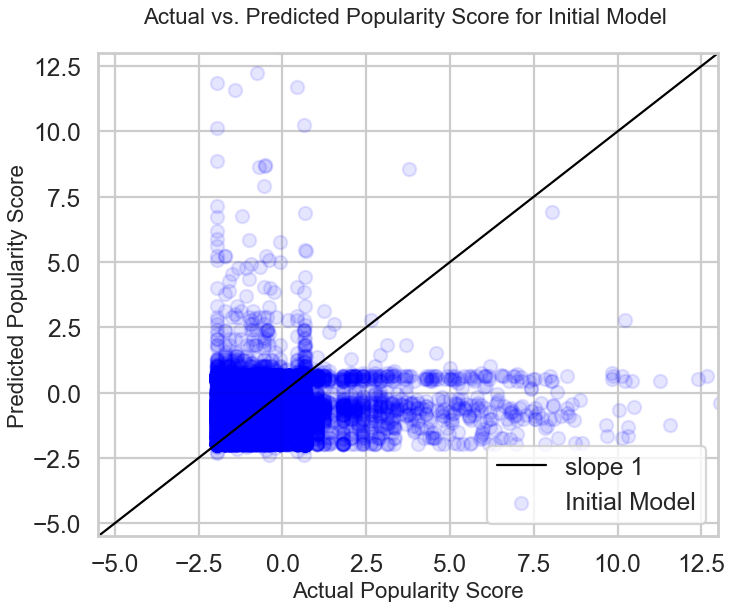

In [111]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(dftouse['logpopularity'][:28567], model1.predict(), color='b', alpha=.1, label="Initial Model")
plt.plot([-5.5,13],[-5.5,13], 'k', label="slope 1", linewidth=2)
plt.xlim(-5.5,13)
plt.ylim(-5.5,13)
plt.xlabel('Actual Popularity Score', size=20)
plt.ylabel('Predicted Popularity Score', size=20)
plt.title("Actual vs. Predicted Popularity Score for Initial Model \n", size=20)
plt.legend(loc=4)
plt.show()

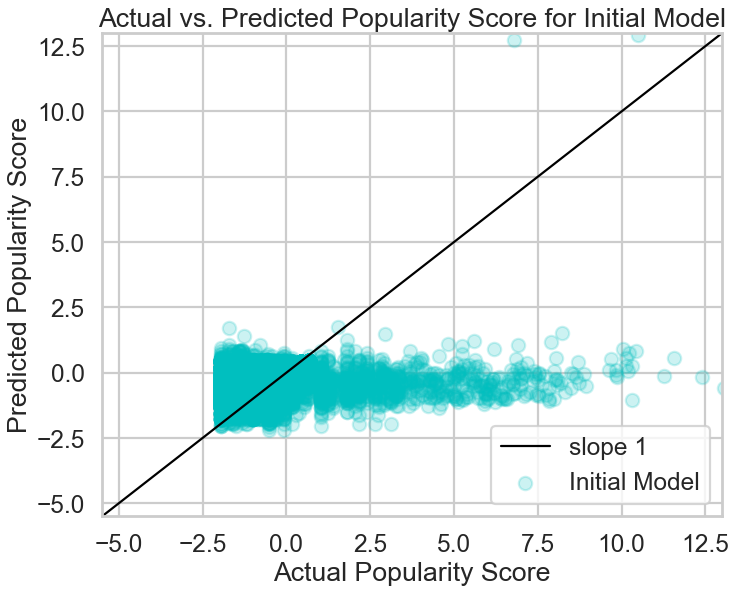

In [116]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(dftouse['logpopularity'], model2.predict(), color='c', alpha=.2, label="Initial Model")
plt.plot([-5.5,13],[-5.5,13], 'k', label="slope 1", linewidth=2)
plt.xlim(-5.5,13)
plt.ylim(-5.5,13)
plt.xlabel('Actual Popularity Score')
plt.ylabel('Predicted Popularity Score')
plt.title("Actual vs. Predicted Popularity Score for Initial Model")
plt.legend(loc=4)
plt.show()

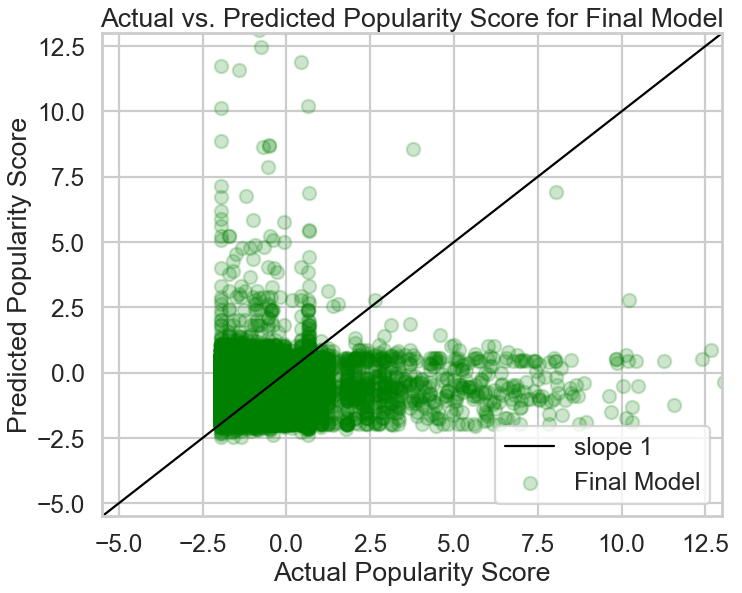

In [117]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(dftouse['logpopularity'][:28567], model3.predict(), color='g', alpha=.2, label="Final Model")
plt.plot([-5.5,13],[-5.5,13], 'k', label="slope 1", linewidth=2)
plt.xlim(-5.5,13)
plt.ylim(-5.5,13)
plt.xlabel('Actual Popularity Score')
plt.ylabel('Predicted Popularity Score')
plt.title("Actual vs. Predicted Popularity Score for Final Model")
plt.legend(loc=4)
plt.show()

Reducing the number of hashtags used in the formula and adding hour posted increased our accuracy by ~31% (compate with model 1).  We can also increase the accuracy by tuning hyper parameters with the help of cross validation

## Limitations

We have several limitations to this study. Data sample bias. The provided sample is biased towards a specific time period, namely Tuesdays. outliers for max size

## Future Tuning

- Character Length and Emojiis, we didn't take out emojiis
- We can also use 0 - inflated poisson
- Naive Bayes Classifier
- Time zone - seeing if local time vs universal time has an effect
- Data need to feed with all weekdays so that we can analayze weekday wise tweet